## Glassdoor Gender Pay Gap ##

## Group Number: 28

## Names ##

Tahel Hermon

Noy Band

Shiraz Cohen

Noam Yehiel

## URL :'https://www.kaggle.com/datasets/nilimajauhari/glassdoor-analyze-gender-pay-gap'## 

In [422]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('mode.chained_assignment', None)

In [395]:
url='https://github.com/tahellll/womenVSmen/raw/main/Glassdoor%20Gender%20Pay%20Gap.csv'
pro_df=pd.read_csv(url)
pro_df=pro_df.copy()
pro_df.head()

,JobTitle,Gender,Age,PerfEval,Education,Dept,Seniority,BasePay,Bonus
0,Graphic Designer,Female,18,5,College,Operations,2,42363,9938
1,Software Engineer,Male,21,5,College,Management,5,108476,11128
2,Warehouse Associate,Female,19,4,PhD,Administration,5,90208,9268
3,Software Engineer,Male,20,5,Masters,Sales,4,108080,10154
4,Graphic Designer,Male,26,5,Masters,Engineering,5,99464,9319


In [396]:
pro_df.isnull().sum().sort_values()


JobTitle     0
Gender       0
Age          0
PerfEval     0
Education    0
Dept         0
Seniority    0
BasePay      0
Bonus        0
dtype: int64

[Text(0.5, 1.0, 'Women VS Man BasePay')]

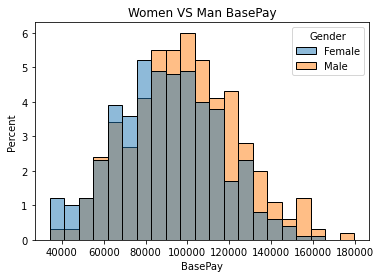

In [406]:
sns.histplot(data=pro_df, x='BasePay', stat='percent', hue='Gender', multiple = 'layer').set(title='Women VS Man BasePay')

we checked if there is a missing values on the data.
by the form chart, we can inform that there is no missing values.

By the chart above, we can infer that women basepay is lower than men.
we wanted to see the distribution of the basepay of every gander, to see the actual number differnce.

In [397]:
meanBasePay=pro_df.pivot_table('BasePay', index='JobTitle', columns='Gender')
meanBasePay

Gender,Female,Male
JobTitle,,
Data Scientist,95704.792453,89222.629630
Driver,86867.630435,91952.666667
Financial Analyst,95458.326531,94607.034483
Graphic Designer,92243.291667,89595.800000
IT,90475.720000,91021.978261
Manager,127252.277778,124848.930556
Marketing Associate,76119.177570,81881.818182
Sales Associate,91894.209302,94663.117647
Software Engineer,94701.000000,106371.485149


In [421]:
project_managment = pro_df.loc[(pro_df.Dept == 'Management')]
table_pro = project_managment.groupby(['Seniority', 'Gender'])['BasePay' ].aggregate('mean').unstack()
table_pro

Gender,Female,Male
Seniority,,
1,70122.285714,81975.227273
2,92516.588235,92272.954545
3,88331.681818,98628.000000
4,102224.450000,108687.333333
5,108628.142857,119624.550000


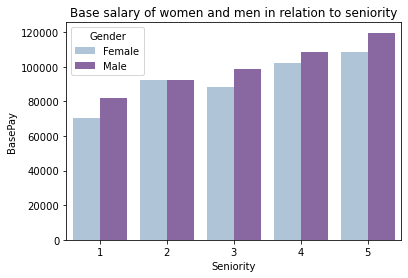

In [ ]:
grouped_pro = project_managment.groupby(['Seniority','Gender'])['BasePay'].aggregate('mean').reset_index()
sns.barplot(data = grouped_pro, x= "Seniority" , y = "BasePay" , hue = "Gender", palette="BuPu").set(title = "Base salary of women and men in relation to seniority")
plt.show()

By the following illustrations we can infer that the CEO and the main managment of the company prefer to employ mens as their company managers.
we saw that in both charts theres a different between the salary of both gender.

<AxesSubplot:>

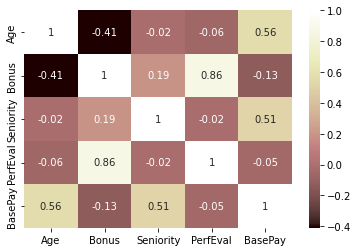

In [400]:
columns = ['Age', 'Bonus','Seniority','PerfEval','BasePay']
correlation_matrix = pro_df[columns].corr(method='pearson').round(2)
sns.heatmap(data=correlation_matrix,cmap='pink', annot=True)

we can conclude that there is not strong correlation between the columns of our data.
The only connection that is obvious and strong is between PerfEval and Bonus.

In [401]:
edu_bp=pro_df.groupby(['Education'])['BasePay'].aggregate('mean').reset_index()
edu_bp

,Education,BasePay
0,College,92126.597510
1,High School,88732.298113
2,Masters,97595.542969
3,PhD,99880.777311


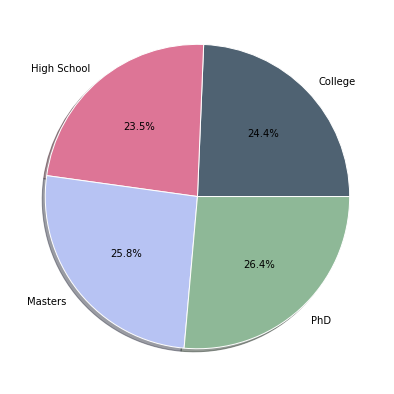

In [402]:
fig=plt.figure(figsize=(10,7))
colorsplt=['#4F6272','#DD7596','#B7C3F3','#8EB897']
plt.pie(edu_bp['BasePay'],labels=edu_bp['Education'],autopct="%1.1f%%",shadow=True,wedgeprops={'linewidth':1,'edgecolor':'white'},colors=colorsplt)
plt.show()

The chance to succeed in life is not always dependent on your education, you can go onward by your own skills.

In [408]:
copy_df=pro_df.copy()
copy_df['Age Group'] = ''
for i in range(0,1000):
    if copy_df['Age'][i]<30:
        copy_df['Age Group'][i]="young"
    elif copy_df['Age'][i]>45:
        copy_df['Age Group'][i]="elderly"
    else:
        copy_df['Age Group'][i]="middle age"
copy_df

,JobTitle,Gender,Age,PerfEval,Education,Dept,Seniority,BasePay,Bonus,Age Group
0,Graphic Designer,Female,18,5,College,Operations,2,42363,9938,young
1,Software Engineer,Male,21,5,College,Management,5,108476,11128,young
2,Warehouse Associate,Female,19,4,PhD,Administration,5,90208,9268,young
3,Software Engineer,Male,20,5,Masters,Sales,4,108080,10154,young
4,Graphic Designer,Male,26,5,Masters,Engineering,5,99464,9319,young
...,...,...,...,...,...,...,...,...,...,...
995,Marketing Associate,Female,61,1,High School,Administration,1,62644,3270,elderly
996,Data Scientist,Male,57,1,Masters,Sales,2,108977,3567,elderly
997,Financial Analyst,Male,48,1,High School,Operations,1,92347,2724,elderly
998,Financial Analyst,Male,65,2,High School,Administration,1,97376,2225,elderly


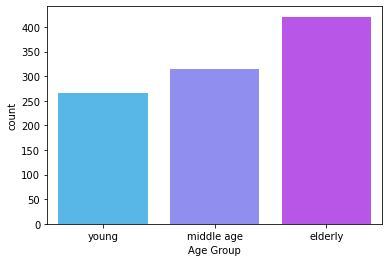

In [409]:
sns.countplot(x="Age Group", data=copy_df,palette='cool')
plt.show()

<AxesSubplot:xlabel='Age Group', ylabel='Bonus'>

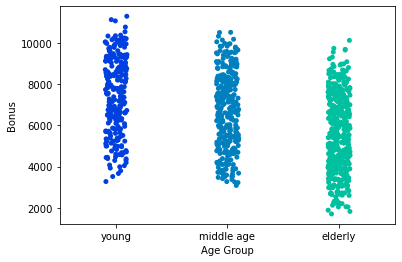

In [404]:
sns.stripplot(x="Age Group", y="Bonus", data=copy_df, jitter=0.1,palette='winter')

In [410]:
copy_df.groupby(['Age Group'])[['JobTitle']].count().reset_index()

,Age Group,JobTitle
0,elderly,421
1,middle age,314
2,young,265


we wanted to know which age group is more determind at work.
by the following illustration we can infer that the "young" group get motivated and work hard to get the bonuses.
In addition, we saw that the company has an interest to keep and preserve the young ones, so they could reap the benefits.